In [0]:
!pip install keras_sequential_ascii

  Running setup.py bdist_wheel for keras-sequential-ascii ... - done
  Stored in directory: /root/.cache/pip/wheels/f5/8d/81/912666dff82a923ce423a7e797cd75f54271c7031512cdb282
Successfully built keras-sequential-ascii


In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import print_summary, to_categorical
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import datetime

from keras.models import Sequential
model = Sequential()
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras_sequential_ascii import sequential_model_to_ascii_printout

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
num_classes=10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.0
x_test /= 255.0

In [0]:
model.add(Conv2D(filters=32, 
                kernel_size=(3, 3),
                activation='relu',
                input_shape=(32, 32, 3)))


model.add(MaxPool2D())

model.add(Conv2D(filters=64,
                kernel_size=(3, 3),
                activation='relu'))
model.add(MaxPool2D())


model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                23050     
Total params: 42,442
Trainable params: 42,442
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
# Tensorboard
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

get_ipython().system_raw('./ngrok http 6006 &')

--2018-12-10 16:03:50--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.152.127.232, 54.173.32.212, 52.87.35.92, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.152.127.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5363700 (5.1M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]   5.11M  --.-KB/s    in 0.1s    

2018-12-10 16:03:50 (41.0 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [5363700/5363700]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ngrok                   


In [0]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://c56b29f7.ngrok.io


In [0]:
batch_size=32
epochs=10



from keras.callbacks import TensorBoard
tbCallBack = TensorBoard(log_dir='./log', histogram_freq=1,
                         write_graph=True,
                         write_grads=True,
                         batch_size=batch_size,
                         write_images=True)




starttime = datetime.datetime.now()

model1 = model.fit(x_train, y_train, batch_size=batch_size, 
                   epochs=epochs, verbose=1, validation_data=(x_test, y_test))

endtime = datetime.datetime.now()
print (endtime - starttime)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 14s 276us/step - loss: 0.9969 - acc: 0.6582 - val_loss: 0.9907 - val_acc: 0.6608
Epoch 2/10
50000/50000 [==============================] - 14s 277us/step - loss: 0.9229 - acc: 0.6843 - val_loss: 0.9778 - val_acc: 0.6648
Epoch 3/10
50000/50000 [==============================] - 14s 278us/step - loss: 0.8719 - acc: 0.7006 - val_loss: 0.9308 - val_acc: 0.6781
Epoch 4/10
50000/50000 [==============================] - 14s 278us/step - loss: 0.8219 - acc: 0.7187 - val_loss: 0.9469 - val_acc: 0.6744
Epoch 5/10
50000/50000 [==============================] - 14s 278us/step - loss: 0.7853 - acc: 0.7290 - val_loss: 0.8831 - val_acc: 0.6975
Epoch 6/10
50000/50000 [==============================] - 14s 277us/step - loss: 0.7534 - acc: 0.7406 - val_loss: 0.9007 - val_acc: 0.6924
Epoch 7/10
50000/50000 [==============================] - 14s 276us/step - loss: 0.7261 - acc: 0.7490 - val_loss: 0.

In [0]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 99us/step
Test loss: 0.9067263765335083
Test accuracy: 0.7005


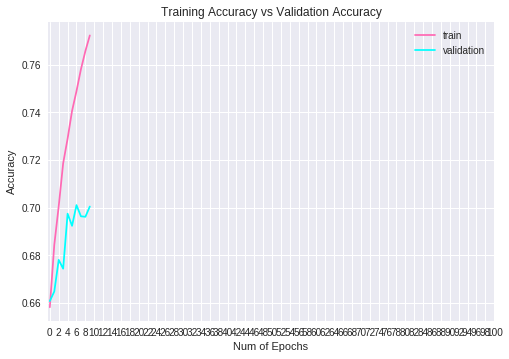

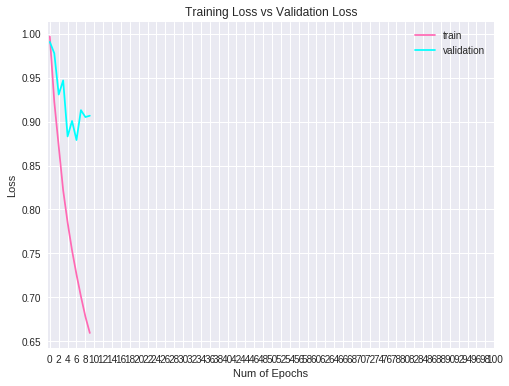

In [0]:
plt.figure(0)
plt.plot(model1.history['acc'],'hotpink')
plt.plot(model1.history['val_acc'],'cyan')
plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
 
plt.figure(1)
plt.plot(model1.history['loss'],'hotpink')
plt.plot(model1.history['val_loss'],'cyan')
plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
 
plt.show()

0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[844  15  46   7  11   2   9  12  35  19]
 [ 61 808   6   4   1   1  12   3  22  82]
 [ 92   3 620  44  84  39  56  39  10  13]
 [ 63   9  96 457  98 106  99  41  19  12]
 [ 43   8  79  35 693  13  66  57   4   2]
 [ 34   5  98 173  60 511  34  61  11  13]
 [ 11   2  60  36  54   9 809   7   8   4]
 [ 39   5  55  28  68  35   9 742   5  14]
 [142  31  13  10   7   5   6   5 758  23]
 [ 74  77  11  11  11   3   7  11  32 763]]


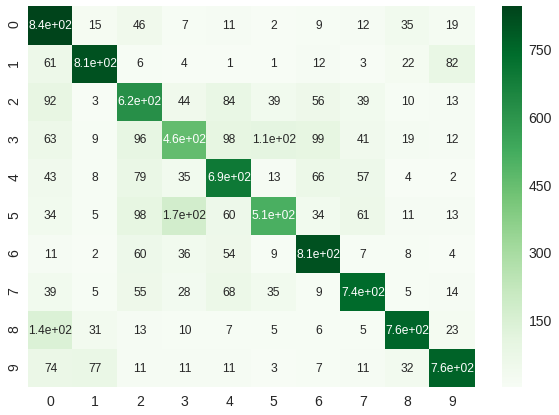

In [0]:
# Confusion matrix result
 
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
 
for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)
 
# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd
 
 
df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Greens",annot=True,annot_kws={"size": 12})# font size
plt.show()

In [0]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

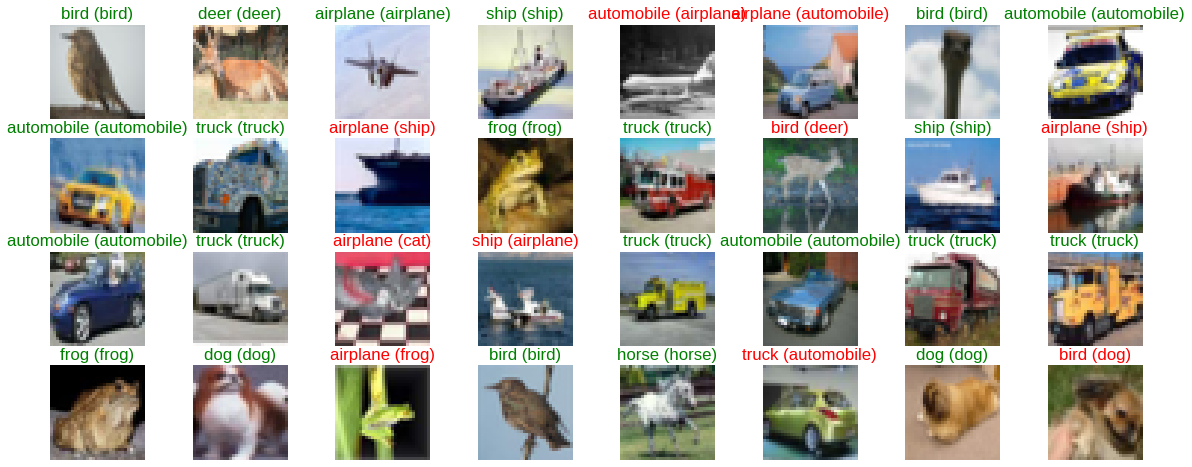

In [0]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))